# Vienna City Guide: the guide to Vienna districts and restaurants

## Introduction:

Each of the 23 Vienna districts display a distinctive character that attracts millions of visitors each year. The capital of Austria does not only have impressive libraries, atmospheric cafes, beautiful palaces, museums and galleries, but also delicious food. 

In this project we will explore types of restaurants that exist in Vienna's districts and provide a guide to visitors looking for their favorite dishes. In particular, we will compare Vienna's 23 districts in order to discover which types of restaurants are most likely to be found in each of the 23 districts. Our target audience are primarily tourists and people coming to study in Vienna.

## Data:

The list of districts will be made by scraping a Wikipedia page: https://de.wikipedia.org/wiki/Wiener_Gemeindebezirke.

Foursquare will be used to get Geospatial Data about restaurants in Vienna. I will use Foursquare data such as the restaurant name, ID, location and food category (Italian, vegetarian, etc.). 

By combining the list of districts and Foursquare date, we will learn about the concentration of restaurants in each of the districts. 

In [1]:
CLIENT_ID = 'A0KEQZDCMP0HGWK2DKTKOTRACD1DLFCQR20R13LS043OXFFN' # your Foursquare ID
CLIENT_SECRET = 'VBBQ0KDFKMROF2FECFTRKJFWZILZXTJ5ZIGX0LXINBG24I43' # your Foursquare Secret
VERSION = '20210114'
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A0KEQZDCMP0HGWK2DKTKOTRACD1DLFCQR20R13LS043OXFFN
CLIENT_SECRET:VBBQ0KDFKMROF2FECFTRKJFWZILZXTJ5ZIGX0LXINBG24I43


In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

print ('Libraries imported.')

Libraries imported.


## Districts

In [14]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [15]:
df = pd.read_html('https://de.wikipedia.org/wiki/Wiener_Gemeindebezirke')[1]

In [5]:
df

,Gemeindebezirk,Bild,Adresse,Anmerkung
0,"1., Innere Stadt",NaN,Wipplingerstraße 6–8,(Altes Rathaus)Gebäude unter Denkmalschutz
1,"2., Leopoldstadt",NaN,Karmelitergasse 9,Gebäude unter Denkmalschutz
2,"3., Landstraße",NaN,Karl-Borromäus-Platz 3,Gebäude unter Denkmalschutz
3,"4., Wieden",NaN,Favoritenstraße 18,NaN
4,"5., Margareten",NaN,Schönbrunner Straße 54,NaN
5,"6., Mariahilf",NaN,Amerlingstraße 11,Gebäude unter Denkmalschutz
6,"7., Neubau",NaN,Hermanngasse 24–26,Gebäude unter Denkmalschutz
7,"8., Josefstadt",NaN,Schlesingerplatz 4,Gebäude unter Denkmalschutz
8,"9., Alsergrund",NaN,Währinger Straße 43,Gebäude unter Denkmalschutz
9,10. Favoriten,NaN,Keplerplatz 5,Gebäude unter Denkmalschutz


In [16]:
df.drop("Bild", axis=1, inplace=True)

In [17]:
df.drop("Adresse", axis=1, inplace=True)

In [18]:
df.drop("Anmerkung", axis=1, inplace=True)

In [19]:
df = df.rename(columns={'Gemeindebezirk':'District'})

In [10]:
df.head(23)

,District
0,"1., Innere Stadt"
1,"2., Leopoldstadt"
2,"3., Landstraße"
3,"4., Wieden"
4,"5., Margareten"
5,"6., Mariahilf"
6,"7., Neubau"
7,"8., Josefstadt"
8,"9., Alsergrund"
9,10. Favoriten


## Foursquare: Geospatial Data

In [11]:
!conda install -c conda-forge geopy --yes

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=1902
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1902
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.



In [21]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Vienna_restaurants")

df['District_Coord']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['District_Coord'].apply(pd.Series)

df.drop(['District_Coord'], axis=1, inplace=True)
df

,District,Latitude,Longitude
0,"1., Innere Stadt",48.209517,16.361570
1,"2., Leopoldstadt",48.217739,16.405709
2,"3., Landstraße",50.960719,10.062009
3,"4., Wieden",48.192314,16.371367
4,"5., Margareten",48.191715,16.358145
5,"6., Mariahilf",46.316818,11.223573
6,"7., Neubau",48.207603,14.202175
7,"8., Josefstadt",51.408126,8.749537
8,"9., Alsergrund",48.217951,16.361049
9,10. Favoriten,48.184781,16.377374


In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=1902
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1902
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.

Libraries imported.


In [23]:
address = 'Vienna, AT'
geolocator = Nominatim(user_agent="Vienna_restaurants")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vienna are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vienna are 48.2083537, 16.3725042.


In [24]:
map_vienna = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna) 
    
map_vienna

## Exploring the First District of Vienna (Innere Stadt)

In [25]:
# Get the neighborhood's name 

df.loc[0, 'District']

'1., Innere Stadt'

In [26]:
# Get the neighborhood's latitude and longitudes values 

neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 1., Innere Stadt are 48.2095168, 16.3615696.


In [27]:
# Get the top 10 venues that are in the first district within a radius of 500 meters.

LIMIT = 10

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=A0KEQZDCMP0HGWK2DKTKOTRACD1DLFCQR20R13LS043OXFFN&client_secret=VBBQ0KDFKMROF2FECFTRKJFWZILZXTJ5ZIGX0LXINBG24I43&v=20210114&ll=48.2095168,16.3615696&radius=500&limit=10'

In [28]:
results = requests.get(url).json()

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
!pip install --upgrade pandas

In [31]:
!conda install -c conda-forge geopy --yes

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=1902
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1902
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
done

# All requested packages already installed.



In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Volksgarten,Park,48.208019,16.361483
1,Burgtheater,Theater,48.210396,16.361441
2,Wiener Eistraum,Skating Rink,48.210613,16.358957
3,Rathausplatz,Plaza,48.210633,16.358707
4,Rathauspark,Park,48.211355,16.359662


In [33]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [34]:
print ('{} unique categories in Innere Stadt.'.format(nearby_venues['categories'].value_counts().shape[0]))

9 unique categories in Innere Stadt.


In [35]:
print (nearby_venues['categories'].value_counts()[0:10])

Park                   2
Theater                1
Austrian Restaurant    1
Skating Rink           1
French Restaurant      1
Plaza                  1
Palace                 1
Café                   1
Restaurant             1
Name: categories, dtype: int64


## Exploring the Districts of Vienna 

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [37]:
Vienna_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

1., Innere Stadt
2., Leopoldstadt
3., Landstraße
4., Wieden
5., Margareten
6., Mariahilf
7., Neubau
8., Josefstadt
9., Alsergrund
10. Favoriten
11., Simmering
12., Meidling
13., Hietzing
14., Penzing
15., Rudolfsheim-Fünfhaus
16., Ottakring
17., Hernals
18., Währing
19., Döbling
20., Brigittenau
21., Floridsdorf
22., Donaustadt
23., Liesing


In [38]:
Vienna_venues.shape

(1656, 7)

In [39]:
# Restaurants Dataframe
Vienna_Venues_restaurant_only = Vienna_venues[Vienna_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Vienna_Venues_restaurant_only.index = np.arange(1, len(Vienna_Venues_restaurant_only)+1)

In [40]:
print (Vienna_Venues_restaurant_only['Venue Category'].value_counts())

Austrian Restaurant              99
Restaurant                       74
Italian Restaurant               50
Asian Restaurant                 24
Greek Restaurant                 20
Chinese Restaurant               13
Vietnamese Restaurant            13
Mediterranean Restaurant         13
Korean Restaurant                11
Sushi Restaurant                  9
Thai Restaurant                   9
Hungarian Restaurant              8
Japanese Restaurant               8
Tapas Restaurant                  8
Turkish Restaurant                8
Doner Restaurant                  7
French Restaurant                 7
Fast Food Restaurant              7
Ethiopian Restaurant              6
Indian Restaurant                 6
Seafood Restaurant                5
Portuguese Restaurant             5
Vegetarian / Vegan Restaurant     5
Middle Eastern Restaurant         5
Persian Restaurant                4
American Restaurant               3
Eastern European Restaurant       2
Mexican Restaurant          

In [41]:
print('There are {} unique categories.'.format(len(Vienna_Venues_restaurant_only['Venue Category'].unique())))

There are 35 unique categories.


In [42]:
# Top 10 categories
Vienna_Venues_Top10 = Vienna_Venues_restaurant_only['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Vienna_Venues_Top10 = Vienna_Venues_Top10.reset_index()
Vienna_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Vienna_Venues_Top10

,Venue_Category,Frequency
0,Austrian Restaurant,99
1,Restaurant,74
2,Italian Restaurant,50
3,Asian Restaurant,24
4,Greek Restaurant,20
5,Chinese Restaurant,13
6,Vietnamese Restaurant,13
7,Mediterranean Restaurant,13
8,Korean Restaurant,11
9,Sushi Restaurant,9


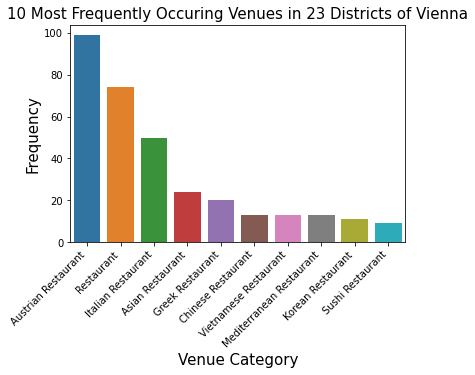

<Figure size 1296x504 with 0 Axes>

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Vienna_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 23 Districts of Vienna', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [44]:
print ("Shape of the Data-Frame with Venue Category Restaurant only: ", Vienna_Venues_restaurant_only.shape)
Vienna_Venues_restaurant_only.head(86)

Shape of the Data-Frame with Venue Category Restaurant only:  (442, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"1., Innere Stadt",48.209517,16.361570,Beaulieu,48.210841,16.365329,French Restaurant
2,"1., Innere Stadt",48.209517,16.361570,Zum Schwarzen Kameel,48.210010,16.368240,Austrian Restaurant
3,"1., Innere Stadt",48.209517,16.361570,DO & CO Restaurant,48.208240,16.371758,Restaurant
4,"1., Innere Stadt",48.209517,16.361570,Palmenhaus,48.204957,16.366855,Restaurant
5,"1., Innere Stadt",48.209517,16.361570,Konoba,48.207123,16.346944,Mediterranean Restaurant
6,"1., Innere Stadt",48.209517,16.361570,Figlmüller,48.209364,16.375614,Austrian Restaurant
7,"1., Innere Stadt",48.209517,16.361570,Lugeck Figlmüller,48.209682,16.375169,Austrian Restaurant
8,"1., Innere Stadt",48.209517,16.361570,BAO BAR,48.199302,16.351109,Asian Restaurant
9,"1., Innere Stadt",48.209517,16.361570,Clementine im Glashaus,48.205944,16.377385,Restaurant
10,"1., Innere Stadt",48.209517,16.361570,Steirereck,48.204371,16.381561,Austrian Restaurant


In [45]:
Vienna_Venues_restaurant = Vienna_Venues_restaurant_only.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [46]:
Vienna_Venues_restaurant

Neighborhood
1., Innere Stadt             15
10. Favoriten                24
11., Simmering               12
12., Meidling                22
14., Penzing                 34
15., Rudolfsheim-Fünfhaus    32
16., Ottakring               25
17., Hernals                 36
18., Währing                 36
19., Döbling                 34
2., Leopoldstadt             31
20., Brigittenau             34
21., Floridsdorf             15
22., Donaustadt               6
23., Liesing                 20
4., Wieden                   20
5., Margareten               24
7., Neubau                    3
9., Alsergrund               19
Name: Venue Category, dtype: int64

In [47]:
Vienna_Venues_restaurant_df  = Vienna_Venues_restaurant.to_frame().reset_index()
Vienna_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Vienna_Venues_restaurant_df.index = np.arange(1, len(Vienna_Venues_restaurant_df)+1)
list_rest_no = Vienna_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Vienna_Venues_restaurant_df['Neighborhood'].to_list()

In [48]:
# one hot encoding
Vienna_onehot = pd.get_dummies(Vienna_Venues_restaurant_only[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Vienna_onehot['Neighborhood'] = Vienna_Venues_restaurant_only['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Vienna_onehot.columns[-1]] + list(Vienna_onehot.columns[:-1])
Vienna_onehot = Vienna_onehot[fixed_columns]

Vienna_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hungarian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"1., Innere Stadt",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"1., Innere Stadt",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"1., Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"1., Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,"1., Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# Examine the dataframe size.
Vienna_onehot.shape

(442, 36)

In [50]:
# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category of restaurant

Vienna_grouped = Vienna_onehot.groupby('Neighborhood').mean().reset_index()
Vienna_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Chinese Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hungarian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"1., Innere Stadt",0.000000,0.066667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.133333,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,10. Favoriten,0.000000,0.083333,0.333333,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.041667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.083333,0.000000,0.00,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667,0.000000
2,"11., Simmering",0.000000,0.166667,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"12., Meidling",0.000000,0.045455,0.318182,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.136364,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,0.045455,0.045455,0.045455
4,"14., Penzing",0.029412,0.058824,0.176471,0.088235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.088235,0.000000,0.000000,0.147059,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.029412,0.00,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000
5,"15., Rudolfsheim-Fünfhaus",0.031250,0.062500,0.093750,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000,0.093750,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.031250,0.000000,0.125000,0.000000,0.00,0.000000,0.000000,0.062500,0.093750,0.062500,0.031250,0.062500
6,"16., Ottakring",0.000000,0.040000,0.160000,0.040000,0.040000,0.040000,0.040000,0.000000,0.000000,0.040000,0.000000,0.040000,0.040000,0.000000,0.080000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.040000,0.00,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.080000
7,"17., Hernals",0.000000,0.055556,0.055556,0.027778,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.194444,0.000000,0.000000,0.055556,0.055556,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.166667,0.027778,0.00,0.027778,0.000000,0.055556,0.027778,0.027778,0.000000,0.055556
8,"18., Währing",0.000000,0.055556,0.138889,0.027778,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.027778,0.027778,0.027778,0.194444,0.000000,0.000000,0.055556,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.138889,0.027778,0.00,0.055556,0.000000,0.027778,0.000000,0.027778,0.000000,0.027778
9,"19., Döbling",0.000000,0.029412,0.264706,0.029412,0.029412,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.058824,0.029412,0.029412,0.147059,0.000000,0.000000,0.058824,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.117647,0.029412,0.00,0.029412,0.029412,0.029412,0.000000,0.000000,0.000

In [51]:
Vienna_grouped.shape

(19, 36)

In [52]:
# Print each neighborhood along with the top 10 most common venues


num_top_venues = 10

for hood in Vienna_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Vienna_grouped[Vienna_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1., Innere Stadt----
                      venue  freq
0       Austrian Restaurant  0.33
1                Restaurant  0.20
2       Japanese Restaurant  0.13
3         Korean Restaurant  0.07
4          Greek Restaurant  0.07
5  Mediterranean Restaurant  0.07
6          Asian Restaurant  0.07
7         French Restaurant  0.07
8     Portuguese Restaurant  0.00
9          Ramen Restaurant  0.00


----10. Favoriten----
                           venue  freq
0            Austrian Restaurant  0.33
1                     Restaurant  0.08
2               Greek Restaurant  0.08
3               Asian Restaurant  0.08
4             Italian Restaurant  0.08
5  Vegetarian / Vegan Restaurant  0.04
6             Turkish Restaurant  0.04
7    Eastern European Restaurant  0.04
8                Thai Restaurant  0.04
9          Portuguese Restaurant  0.04


----11., Simmering----
                   venue  freq
0    Austrian Restaurant  0.42
1             Restaurant  0.25
2       Asian Restaurant  0.17

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        #print(columns)
    except:
        print("exception")
        columns.append('{}th Most Common Venue'.format(ind+1))
       # print(columns)
    
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vienna_grouped['Neighborhood']

for ind in np.arange(Vienna_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vienna_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

exception
exception
exception
exception
exception
exception
exception


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"1., Innere Stadt",Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,10. Favoriten,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
2,"11., Simmering",Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
3,"12., Meidling",Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
4,"14., Penzing",Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant
5,"15., Rudolfsheim-Fünfhaus",Restaurant,Italian Restaurant,Austrian Restaurant,Thai Restaurant,Vietnamese Restaurant,Turkish Restaurant,Tapas Restaurant,Persian Restaurant,Mediterranean Restaurant,Asian Restaurant
6,"16., Ottakring",Austrian Restaurant,Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant,Hungarian Restaurant,Greek Restaurant
7,"17., Hernals",Italian Restaurant,Restaurant,Korean Restaurant,Tapas Restaurant,Mediterranean Restaurant,Asian Restaurant,Vietnamese Restaurant,Austrian Restaurant,Ethiopian Restaurant,Persian Restaurant
8,"18., Währing",Italian Restaurant,Austrian Restaurant,Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Turkish Restaurant,Tapas Restaurant,Seafood Restaurant
9,"19., Döbling",Austrian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Greek Restaurant,Indian Restaurant,Tapas Restaurant,Szechuan Restaurant,Sushi Restaurant,Seafood Restaurant


## Clustering Neighborhoods

In [61]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters 
kclusters = 5

Vienna_grouped_clustering = Vienna_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vienna_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 2, 4, 4, 4, 4, 4, 2], dtype=int32)

In [62]:
Vienna_merged = df
Vienna_merged.head(23)

,District,Latitude,Longitude
0,"1., Innere Stadt",48.209517,16.361570
1,"2., Leopoldstadt",48.217739,16.405709
2,"3., Landstraße",50.960719,10.062009
3,"4., Wieden",48.192314,16.371367
4,"5., Margareten",48.191715,16.358145
5,"6., Mariahilf",46.316818,11.223573
6,"7., Neubau",48.207603,14.202175
7,"8., Josefstadt",51.408126,8.749537
8,"9., Alsergrund",48.217951,16.361049
9,10. Favoriten,48.184781,16.377374


In [63]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"1., Innere Stadt",Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,10. Favoriten,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
2,"11., Simmering",Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
3,"12., Meidling",Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
4,"14., Penzing",Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant
5,"15., Rudolfsheim-Fünfhaus",Restaurant,Italian Restaurant,Austrian Restaurant,Thai Restaurant,Vietnamese Restaurant,Turkish Restaurant,Tapas Restaurant,Persian Restaurant,Mediterranean Restaurant,Asian Restaurant
6,"16., Ottakring",Austrian Restaurant,Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant,Hungarian Restaurant,Greek Restaurant
7,"17., Hernals",Italian Restaurant,Restaurant,Korean Restaurant,Tapas Restaurant,Mediterranean Restaurant,Asian Restaurant,Vietnamese Restaurant,Austrian Restaurant,Ethiopian Restaurant,Persian Restaurant
8,"18., Währing",Italian Restaurant,Austrian Restaurant,Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Turkish Restaurant,Tapas Restaurant,Seafood Restaurant
9,"19., Döbling",Austrian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Greek Restaurant,Indian Restaurant,Tapas Restaurant,Szechuan Restaurant,Sushi Restaurant,Seafood Restaurant


In [64]:
neighborhoods_venues_sorted_clusters = neighborhoods_venues_sorted

In [65]:
neighborhoods_venues_sorted_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"1., Innere Stadt",Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,10. Favoriten,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
2,"11., Simmering",Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
3,"12., Meidling",Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
4,"14., Penzing",Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant
5,"15., Rudolfsheim-Fünfhaus",Restaurant,Italian Restaurant,Austrian Restaurant,Thai Restaurant,Vietnamese Restaurant,Turkish Restaurant,Tapas Restaurant,Persian Restaurant,Mediterranean Restaurant,Asian Restaurant
6,"16., Ottakring",Austrian Restaurant,Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant,Hungarian Restaurant,Greek Restaurant
7,"17., Hernals",Italian Restaurant,Restaurant,Korean Restaurant,Tapas Restaurant,Mediterranean Restaurant,Asian Restaurant,Vietnamese Restaurant,Austrian Restaurant,Ethiopian Restaurant,Persian Restaurant
8,"18., Währing",Italian Restaurant,Austrian Restaurant,Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Turkish Restaurant,Tapas Restaurant,Seafood Restaurant


In [66]:
# add clustering labels
neighborhoods_venues_sorted_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [67]:
neighborhoods_venues_sorted_clusters.head(23)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"1., Innere Stadt",Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,2,10. Favoriten,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
2,0,"11., Simmering",Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
3,2,"12., Meidling",Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
4,4,"14., Penzing",Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant
5,4,"15., Rudolfsheim-Fünfhaus",Restaurant,Italian Restaurant,Austrian Restaurant,Thai Restaurant,Vietnamese Restaurant,Turkish Restaurant,Tapas Restaurant,Persian Restaurant,Mediterranean Restaurant,Asian Restaurant
6,4,"16., Ottakring",Austrian Restaurant,Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant,Hungarian Restaurant,Greek Restaurant
7,4,"17., Hernals",Italian Restaurant,Restaurant,Korean Restaurant,Tapas Restaurant,Mediterranean Restaurant,Asian Restaurant,Vietnamese Restaurant,Austrian Restaurant,Ethiopian Restaurant,Persian Restaurant
8,4,"18., Währing",Italian Restaurant,Austrian Restaurant,Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Turkish Restaurant,Tapas Restaurant,Seafood Restaurant
9,2,"19., Döbling",Austrian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Greek Restaurant,Indian Restaurant,Tapas Restaurant,Szechuan Restaurant,Sushi Restaurant,Seafood Restaurant


In [68]:
Vienna_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

Vienna_merged = Vienna_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='inner')

Vienna_merged.head(23)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"1., Innere Stadt",48.209517,16.361570,0,Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,"2., Leopoldstadt",48.217739,16.405709,0,Austrian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Ramen Restaurant,Tapas Restaurant,Falafel Restaurant,French Restaurant
3,"4., Wieden",48.192314,16.371367,0,Austrian Restaurant,Restaurant,Asian Restaurant,Greek Restaurant,Hungarian Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,French Restaurant,American Restaurant,Persian Restaurant
4,"5., Margareten",48.191715,16.358145,2,Austrian Restaurant,Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Doner Restaurant,Portuguese Restaurant,Thai Restaurant,Mediterranean Restaurant,Sushi Restaurant
6,"7., Neubau",48.207603,14.202175,3,Restaurant,Austrian Restaurant,American Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Spanish Restaurant
8,"9., Alsergrund",48.217951,16.361049,0,Austrian Restaurant,Restaurant,French Restaurant,Mediterranean Restaurant,Japanese Restaurant,Korean Restaurant,Middle Eastern Restaurant,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant
9,10. Favoriten,48.184781,16.377374,2,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
10,"11., Simmering",48.154152,16.437715,0,Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
11,"12., Meidling",48.177762,16.330749,2,Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
13,"14., Penzing",48.209485,16.283615,4,Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant


In [72]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Vienna_merged['Latitude'], 
                                  Vienna_merged['Longitude'], 
                                  Vienna_merged['Neighborhood'], 
                                  Vienna_merged['Cluster Labels']):
    label  = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Examining the 5 Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

### Cluster 1

In [79]:
Vienna_merged.loc[Vienna_merged['Cluster Labels'] == 0, Vienna_merged.columns[[1] + list(range (4, Vienna_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48.209517,Austrian Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Greek Restaurant,Mediterranean Restaurant,Asian Restaurant,French Restaurant,Portuguese Restaurant,Ramen Restaurant
1,48.217739,Austrian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Ramen Restaurant,Tapas Restaurant,Falafel Restaurant,French Restaurant
3,48.192314,Austrian Restaurant,Restaurant,Asian Restaurant,Greek Restaurant,Hungarian Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,French Restaurant,American Restaurant,Persian Restaurant
8,48.217951,Austrian Restaurant,Restaurant,French Restaurant,Mediterranean Restaurant,Japanese Restaurant,Korean Restaurant,Middle Eastern Restaurant,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant
10,48.154152,Austrian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant


Cluster 1 could be called the Austrian Cluster.

### Cluster 2

In [80]:
Vienna_merged.loc[Vienna_merged['Cluster Labels'] == 1, Vienna_merged.columns[[1] + list(range (4, Vienna_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,48.207262,Italian Restaurant,Austrian Restaurant,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,American Restaurant,Seafood Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant
22,48.138326,Italian Restaurant,Chinese Restaurant,Austrian Restaurant,Fast Food Restaurant,Greek Restaurant,American Restaurant,Spanish Restaurant,Asian Restaurant,Restaurant,Portuguese Restaurant


Cluster 2 could be called the Italian Cluster.

### Cluster 3

In [81]:
Vienna_merged.loc[Vienna_merged['Cluster Labels'] == 2, Vienna_merged.columns[[1] + list(range (4, Vienna_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,48.191715,Austrian Restaurant,Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Doner Restaurant,Portuguese Restaurant,Thai Restaurant,Mediterranean Restaurant,Sushi Restaurant
9,48.184781,Austrian Restaurant,Restaurant,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Eastern European Restaurant,Thai Restaurant,Portuguese Restaurant
11,48.177762,Austrian Restaurant,Restaurant,Thai Restaurant,Vietnamese Restaurant,Greek Restaurant,Portuguese Restaurant,Asian Restaurant,Italian Restaurant,Hungarian Restaurant,Persian Restaurant
18,48.244613,Austrian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Greek Restaurant,Indian Restaurant,Tapas Restaurant,Szechuan Restaurant,Sushi Restaurant,Seafood Restaurant
19,48.243360,Austrian Restaurant,Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Tapas Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant


Cluster 3 could be called the Austrian Cluster. 

### Cluster 4

In [83]:
Vienna_merged.loc[Vienna_merged['Cluster Labels'] == 3, Vienna_merged.columns[[1] + list(range (4, Vienna_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,48.207603,Restaurant,Austrian Restaurant,American Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Spanish Restaurant


Cluster 4 could be called the diverse Cluster. 

### Cluster 5

In [84]:
Vienna_merged.loc[Vienna_merged['Cluster Labels'] == 4, Vienna_merged.columns[[1] + list(range (4, Vienna_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,48.209485,Restaurant,Austrian Restaurant,Italian Restaurant,Greek Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Mediterranean Restaurant,Japanese Restaurant,Seafood Restaurant
14,48.195475,Restaurant,Italian Restaurant,Austrian Restaurant,Thai Restaurant,Vietnamese Restaurant,Turkish Restaurant,Tapas Restaurant,Persian Restaurant,Mediterranean Restaurant,Asian Restaurant
15,48.210229,Austrian Restaurant,Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Asian Restaurant,Hungarian Restaurant,Greek Restaurant
16,48.222760,Italian Restaurant,Restaurant,Korean Restaurant,Tapas Restaurant,Mediterranean Restaurant,Asian Restaurant,Vietnamese Restaurant,Austrian Restaurant,Ethiopian Restaurant,Persian Restaurant
17,48.234115,Italian Restaurant,Austrian Restaurant,Restaurant,Korean Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant,Turkish Restaurant,Tapas Restaurant,Seafood Restaurant
20,48.279815,Restaurant,Fast Food Restaurant,Italian Restaurant,Austrian Restaurant,Mexican Restaurant,Asian Restaurant,Kebab Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant


Cluster 5 could be called the diverse/Austrian/Italian Cluster. 

## Thank you for reading!